In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
# Load the data (assuming each sheet has the same format)
yolopose_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_yolopose.xlsx")
mediapipe_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_mediapipe.xlsx")
movenet_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_movenet.xlsx")
keypoint_rcnn_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_keypoint_rcnn.xlsx")
hybrid_df=pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\GROK\checkdataset_keypoint_coordinates_.xlsx")
# Assuming ground truth is in all sheets, extract one of them
groundtruth_df = pd.read_excel(r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\EXCEL\checkdataset_gt.xlsx") 
 # Example: Extract from yolopose.xlsx # Example: Extract from yolopose.xlsx


In [17]:
keypoints = ["left_shoulder", "left_elbow", "left_wrist", "left_hip", "left_knee", "left_ankle"]



In [18]:
# Function to compute Percentage of Correctly Predicted Keypoints (PCK)
def compute_pck(pred_df, gt_df, keypoints, threshold=0.00002):
    pck_scores = {}

    for keypoint in keypoints:
        x_pred, y_pred = pred_df[f"{keypoint}_x"], pred_df[f"{keypoint}_y"]
        x_gt, y_gt = gt_df[f"{keypoint}_x"], gt_df[f"{keypoint}_y"]

        # Compute Euclidean distance error
        errors = np.sqrt((x_pred - x_gt) ** 2 + (y_pred - y_gt) ** 2)

        # Define reference length (e.g., 10% of image width, assume width=640)
        reference_length = 640 * threshold

        # Count keypoints within threshold
        correct_predictions = np.sum(errors <= reference_length)

        # Compute PCK score
        pck_scores[keypoint] = (correct_predictions / len(errors)) * 100

    return pck_scores


In [19]:
yolopose_pck = compute_pck(yolopose_df, groundtruth_df, keypoints)
mediapipe_pck = compute_pck(mediapipe_df, groundtruth_df, keypoints)
movenet_pck = compute_pck(movenet_df, groundtruth_df, keypoints)
keypoint_rcnn_pck = compute_pck(keypoint_rcnn_df, groundtruth_df, keypoints)
hybrid_pck = compute_pck(hybrid_df, groundtruth_df, keypoints)



In [20]:
# Create a DataFrame to store PCK results
pck_df = pd.DataFrame({
    "Keypoint": keypoints,
    #"YOLOPose": [yolopose_pck[k] for k in keypoints],
    "MediaPipe": [mediapipe_pck[k] for k in keypoints],
    #"Movenet": [movenet_pck[k] for k in keypoints],
    "Keypoint R-CNN": [keypoint_rcnn_pck[k] for k in keypoints],
    "Hybrid": [hybrid_pck[k] for k in keypoints]
})

print("Percentage of Correctly Predicted Keypoints (PCK) Table:")
print(pck_df)


Percentage of Correctly Predicted Keypoints (PCK) Table:
        Keypoint  MediaPipe  Keypoint R-CNN  Hybrid
0  left_shoulder       56.0           100.0   100.0
1     left_elbow       92.0            96.0   100.0
2     left_wrist       96.0            96.0    96.0
3       left_hip       40.0            84.0    84.0
4      left_knee       92.0            92.0    92.0
5     left_ankle       80.0            88.0    88.0


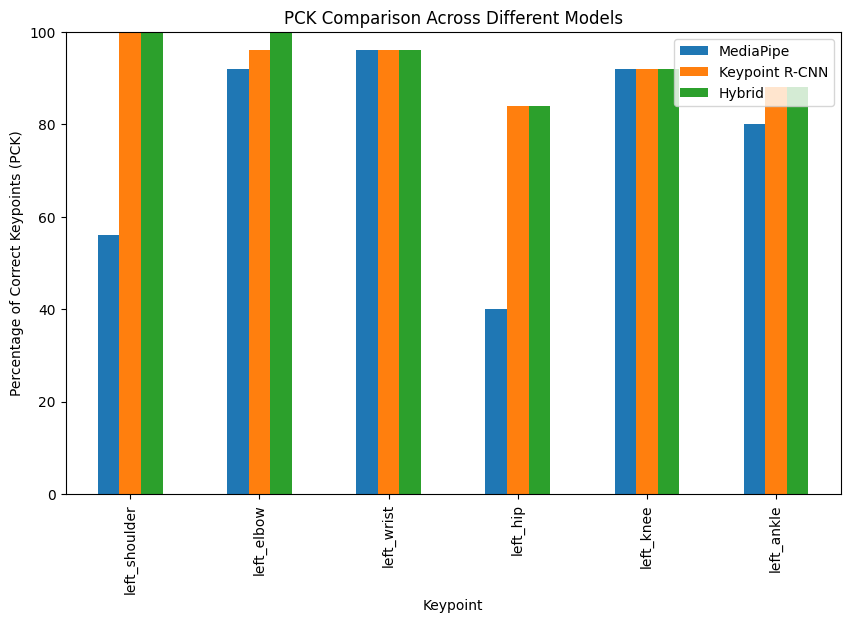

In [21]:
# Plot PCK comparison
pck_df.set_index("Keypoint").plot(kind="bar", figsize=(10, 6))
plt.ylabel("Percentage of Correct Keypoints (PCK)")
plt.title("PCK Comparison Across Different Models")
plt.ylim(0, 100)  # PCK is percentage-based, so limit the range from 0 to 100
plt.show()


In [22]:
# Compute overall PCK across all keypoints
overall_pck = {
    "YOLOPose": np.mean(list(yolopose_pck.values())),
    "MediaPipe": np.mean(list(mediapipe_pck.values())),
    "Movenet": np.mean(list(movenet_pck.values())),
    "Keypoint R-CNN": np.mean(list(keypoint_rcnn_pck.values())),
    "Hybrid": np.mean(list(hybrid_pck.values()))
}

print("Overall Percentage of Correctly Predicted Keypoints (PCK):")
print(overall_pck)


Overall Percentage of Correctly Predicted Keypoints (PCK):
{'YOLOPose': 59.333333333333336, 'MediaPipe': 76.0, 'Movenet': 53.333333333333336, 'Keypoint R-CNN': 92.66666666666667, 'Hybrid': 93.33333333333333}
